In [1]:
from service_loader import sys_append_abs, Path
sys_append_abs()
from detection.services.service import get_image, visualize_bbox, convertFromJson, convertToXYmax

In [2]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
ROOT = Path('__file__').resolve().parents[2]

In [ ]:
content_path = glob.glob(os.path.join(ROOT, 'data/content/*'))
content_path

In [ ]:
list_train = glob.glob(os.path.join(ROOT, 'data/content/*/*.csv'))
list_train

In [6]:
def get_image_name(item):
    return item['image'].split('/')[-2] + '____' +  item['image'].split('/')[-1].split('.')[0]

def get_bbox(data):
    bbox_1 = data['xmin'], data['ymin'], data['xmax'], data['ymax']
    return bbox_1

def get_crop(img, bbox):
    return img[bbox[1]:bbox[3], bbox[0]:bbox[2]]

def wrapper(pth):
    def root2path(item):
        return os.path.join(pth, item)
    return root2path

def joiner(csv_item):
    data = pd.read_csv(csv_item)
    pth = '/'.join(csv_item.split('/')[:-1])
    if 'xmin' not in data.columns:
        data = convertFromJson(data)
        data = convertToXYmax(data)
    data['image'] = data['image'].apply(wrapper(pth))
    return data

/root/workspace/work/Digital-Tashkent/Signs/data/content/13082022/13.08.2022 full_csv.csv
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


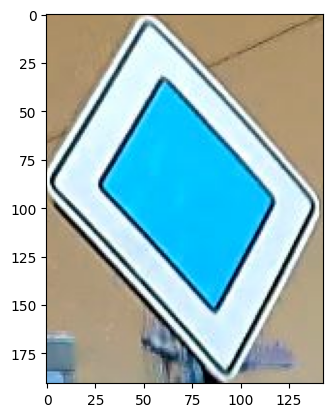

In [7]:
# 18 trash file
index = 13
index2 = 400
print(list_train[index])
data = joiner(list_train[index])
im, bbox = get_image(data, index2)
bbox = list(map(int, bbox))
plt.imshow(get_crop(im, bbox))

In [ ]:
for item in list_train:
    data = joiner(item)
    data.dropna(inplace=True)
    for index in range(len(data)):
        
        series = data.iloc[index]
        cls_ = series['name'].replace(' ', '')
        im, bbox = get_image(data, index)
        bbox = list(map(int, bbox))
        im = get_crop(im, bbox)
        image_pth = get_image_name(series)
        pth = f"data/signs/{cls_}"
        Path(pth).mkdir(parents=True, exist_ok=True)
        cv2.imwrite(pth + f'/{image_pth}_{index}.jpg', im)
        # break
    # break
